<a href="https://colab.research.google.com/github/alexoliveros92/ANN/blob/main/ANN_Binomial_Indian_Liver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [ ]:
col_names=['preg','plas','pres','skin','test','mass','pedi','age','class']
data=pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv',names=col_names)
data
data = data.drop(data.index[[0]])
data.head(9)
#data.info()

preg plas pres skin test mass pedi   age class
65 0   0.7  0.1  187   16   18  6.8  3.3   0.9     1
62 1  10.9  5.5  699   64  100  7.5  3.2  0.74     1
   1   7.3  4.1  490   60   68    7  3.3  0.89     1
58 1     1  0.4  182   14   20  6.8  3.4     1     1
72 1   3.9    2  195   27   59  7.3  2.4   0.4     1
46 1   1.8  0.7  208   19   14  7.6  4.4   1.3     1
26 0   0.9  0.2  154   16   12    7  3.5     1     1
29 0   0.9  0.3  202   14   11  6.7  3.6   1.1     1
17 1   0.9  0.3  202   22   19  7.4  4.1   1.2     2

In [ ]:
convert_dict = {'preg': float,
                'plas': float,
                'pres':float,                
                'skin':float,
                'test':float,
                'mass':float,
                'pedi':float,
                'age':float,
                'class':float
               }
data = data.astype(convert_dict)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 583 entries, ('65', '0') to ('38', '1')
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    583 non-null    float64
 1   plas    583 non-null    float64
 2   pres    583 non-null    float64
 3   skin    583 non-null    float64
 4   test    583 non-null    float64
 5   mass    583 non-null    float64
 6   pedi    583 non-null    float64
 7   age     583 non-null    float64
 8   class   583 non-null    float64
dtypes: float64(9)
memory usage: 44.9+ KB


In [ ]:
import numpy as np
data.test.replace(0,np.nan, inplace=True)
data.mass.replace(0,np.nan, inplace=True)
data.pedi.replace(0,np.nan, inplace=True)
data.info()

In [ ]:
from sklearn.impute import SimpleImputer as imp

imput = imp(missing_values=np.nan, strategy='mean')
imput.fit(data)
X1 = imput.transform(data)
#np.set_printoptions(precision=3)
X1[0:5,:]

In [ ]:
df = pd.DataFrame(data=X1, columns=['preg','plas','pres','skin','test','mass','pedi','age','class'])
X= df.drop('class', axis=1)
#print(X)
Y=df['class']
Y=Y.values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler #normalising the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(X)
xscale=scaler_x.transform(X)
scaler_y.fit(Y)
yscale=scaler_y.transform(Y)
yscale
xscale

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2,random_state=3)

X_test.shape
X_train.shape

(466, 8)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/150
38/38 [==============================] - 1s 8ms/step - loss: 0.5029 - accuracy: 0.7366 - val_loss: 0.4922 - val_accuracy: 0.6809
Epoch 2/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.7097 - val_loss: 0.4922 - val_accuracy: 0.6915
Epoch 3/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.7285 - val_loss: 0.4929 - val_accuracy: 0.6702
Epoch 4/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.7285 - val_loss: 0.4940 - val_accuracy: 0.6915
Epoch 5/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7151 - val_loss: 0.4931 - val_accuracy: 0.6915
Epoch 6/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.7312 - val_loss: 0.4928 - val_accuracy: 0.6702
Epoch 7/150
38/38 [==============================] - 0s 3ms/step - loss: 0.5002 - accuracy: 0.7312 - val_loss: 0.4932 - val_accuracy: 0.6915
Epoch 8/150
3

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
evalu =model.evaluate(X_train,y_train)
print(model.metrics_names[1], evalu[1]*100)

15/15 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7318
accuracy 73.17596673965454


In [ ]:
evalu =model.evaluate(X_test,y_test)
print(model.metrics_names[1], evalu[1]*100)

4/4 [==============================] - 0s 4ms/step - loss: 0.5050 - accuracy: 0.7350
accuracy 73.50427508354187


In [ ]:
from sklearn.metrics import accuracy_score
yhat= model.predict(X_test)

yhat
y_test

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],

In [ ]:
ypred=[]
for i in yhat:
    if i > 0.5:
        ypred.append(1.0)
    else:
        ypred.append(0.0)
ypred

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0]

In [ ]:
acc_=accuracy_score(y_test,ypred)
acc_

0.7350427350427351

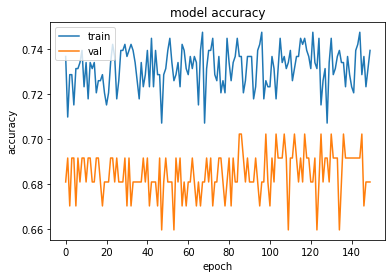

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

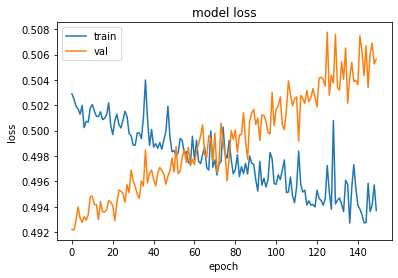

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()